In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


> **Data pre-processing**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample_sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

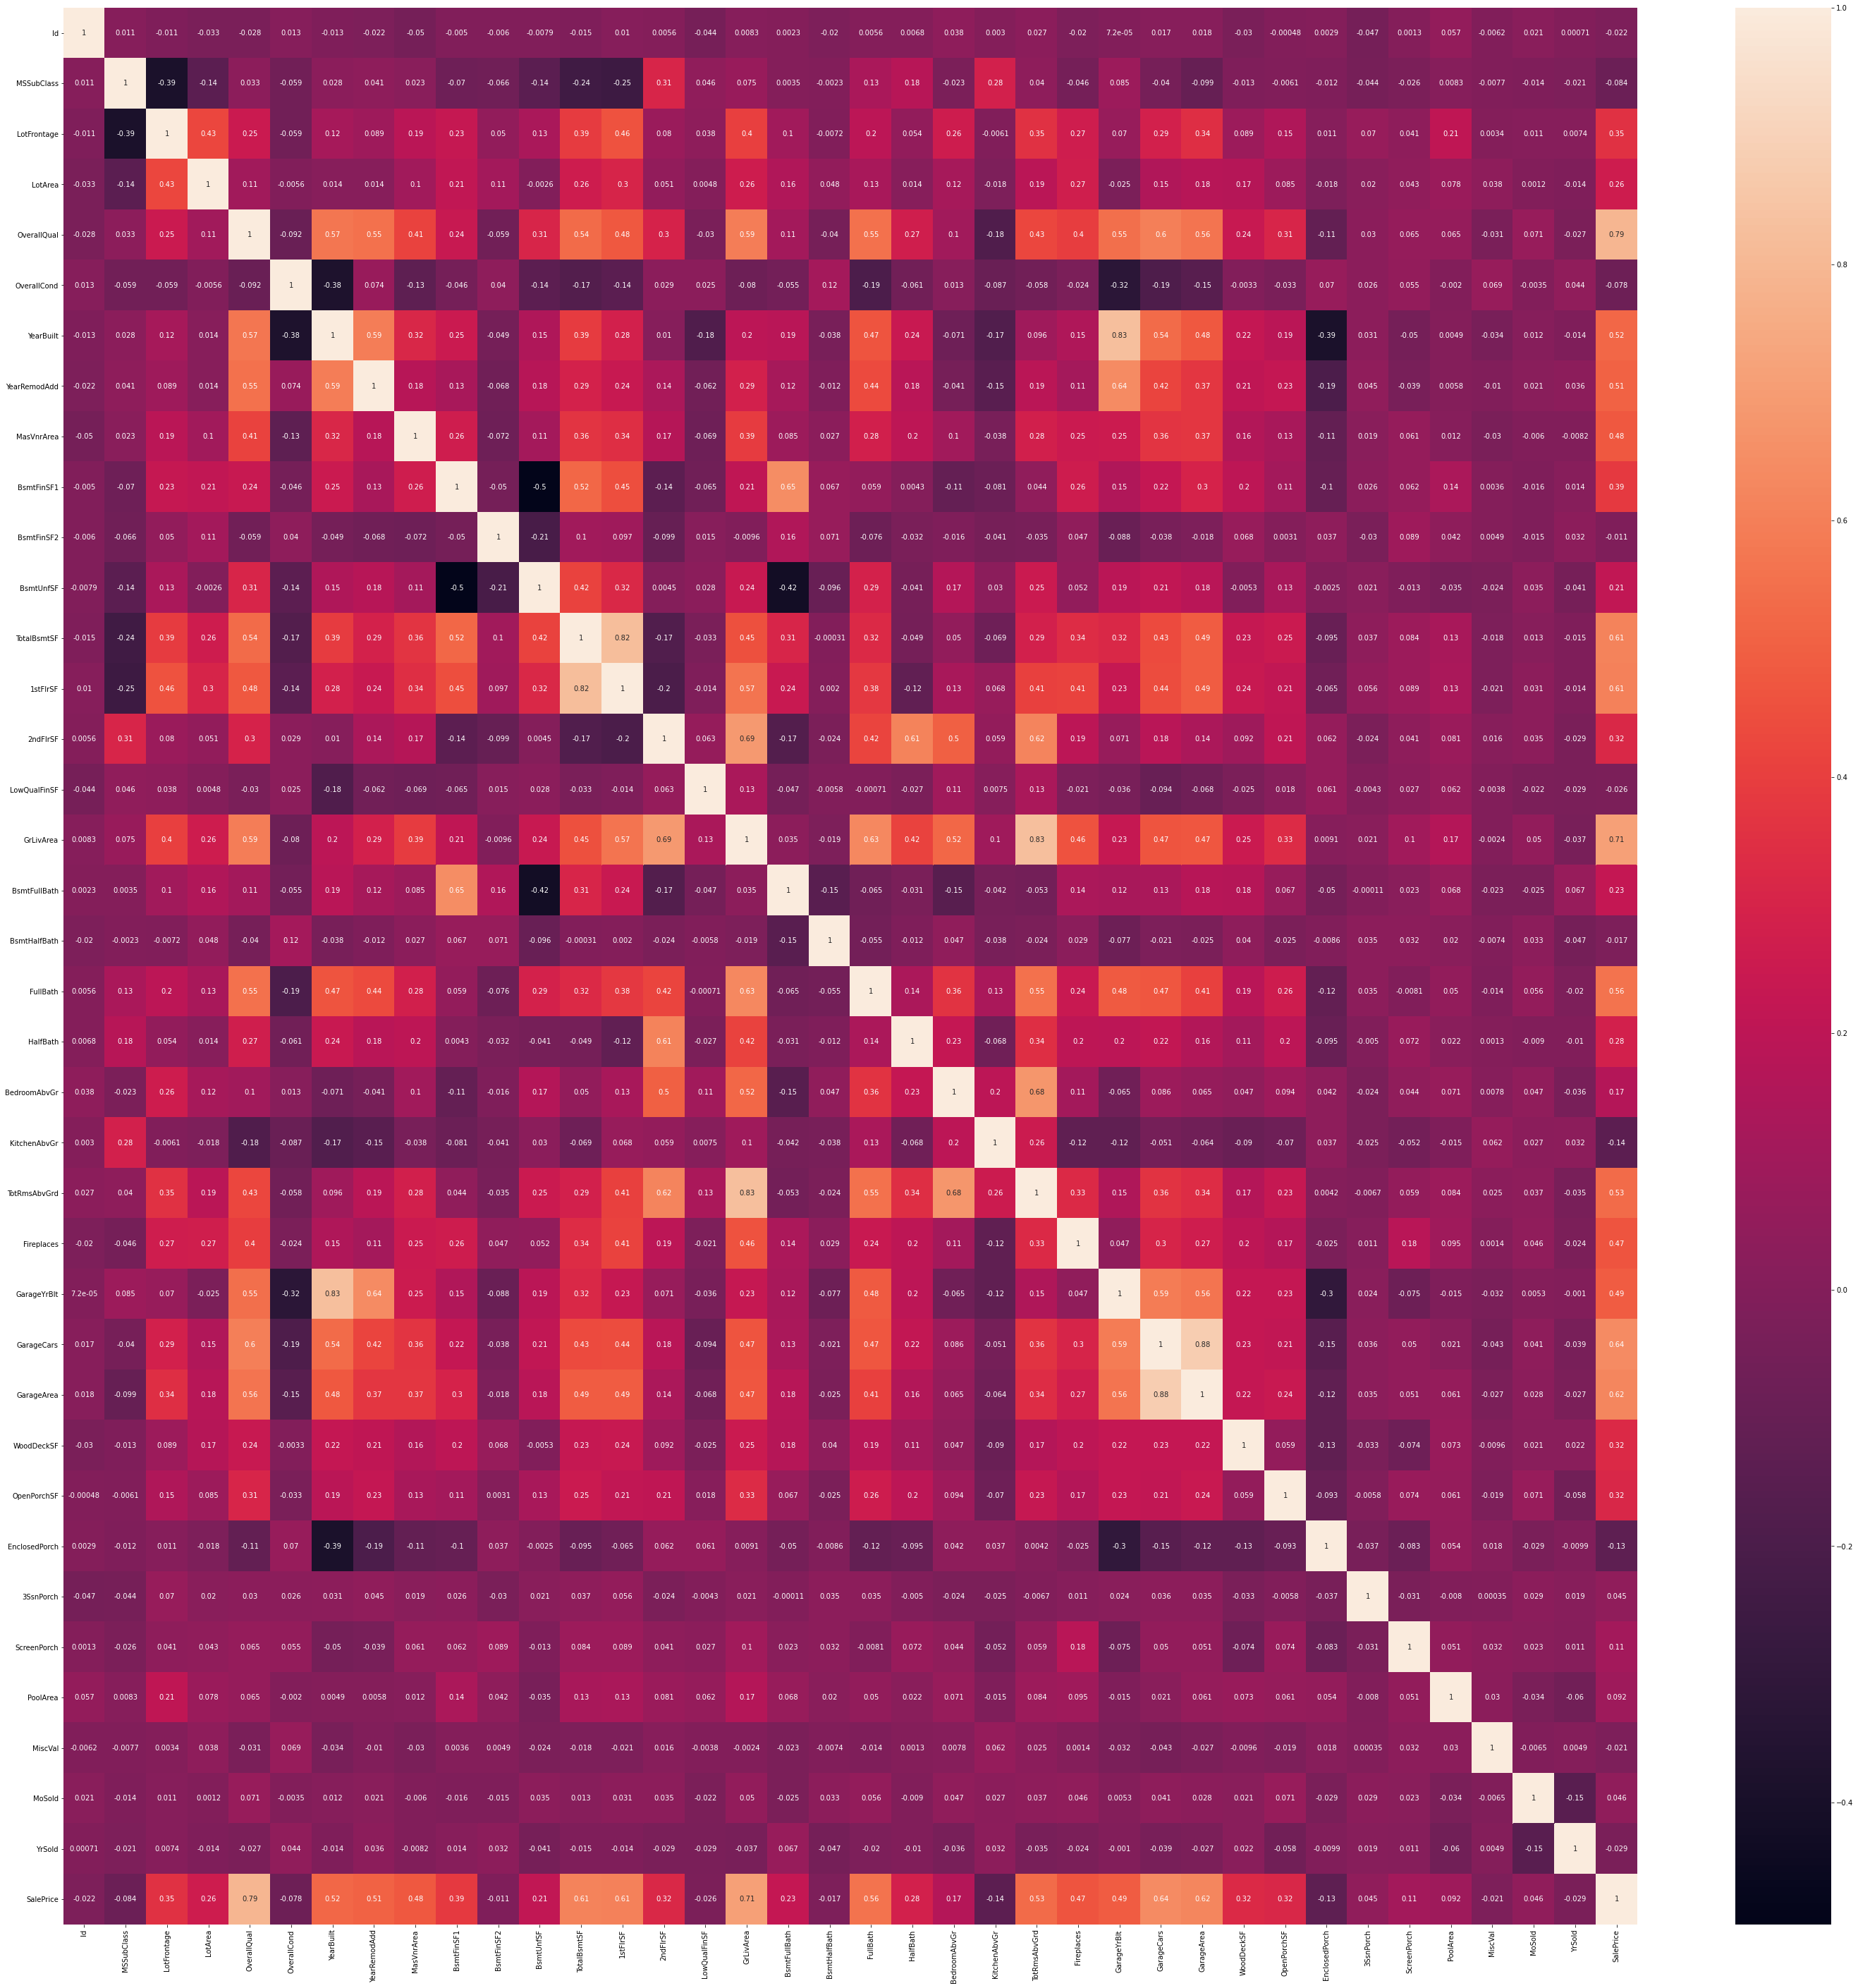

In [6]:
correlations = train.corr()
f, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlations, annot=True)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [10]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

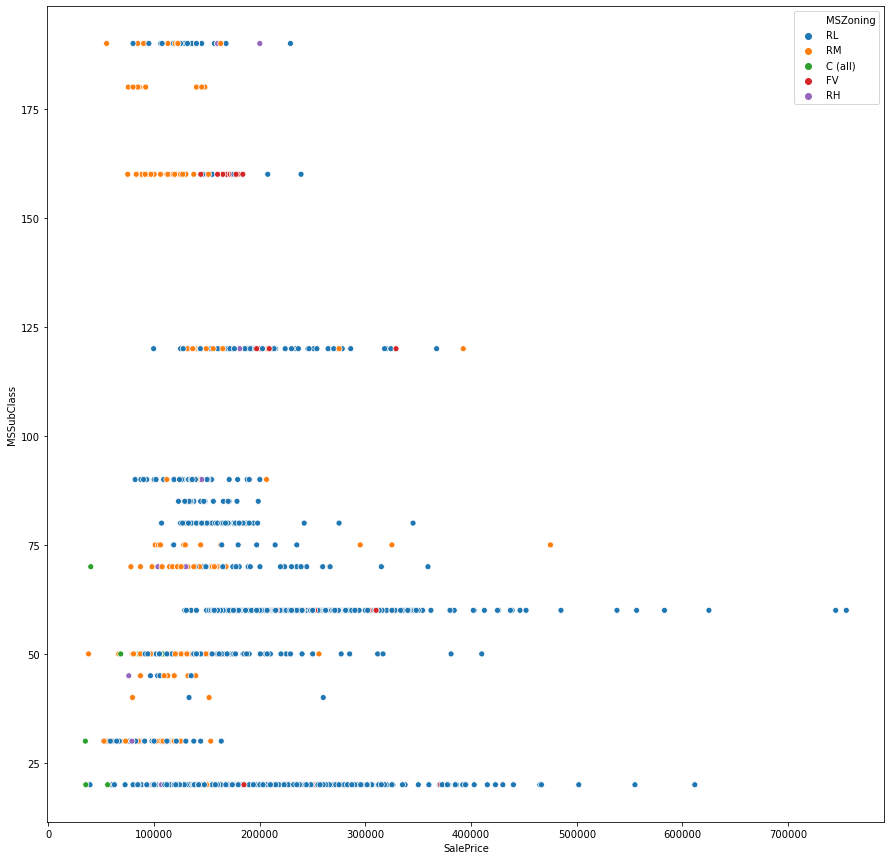

In [11]:
plt.figure(figsize=[15,15])
sns.scatterplot(x = 'SalePrice', y = 'MSSubClass', hue = 'MSZoning', data = train)

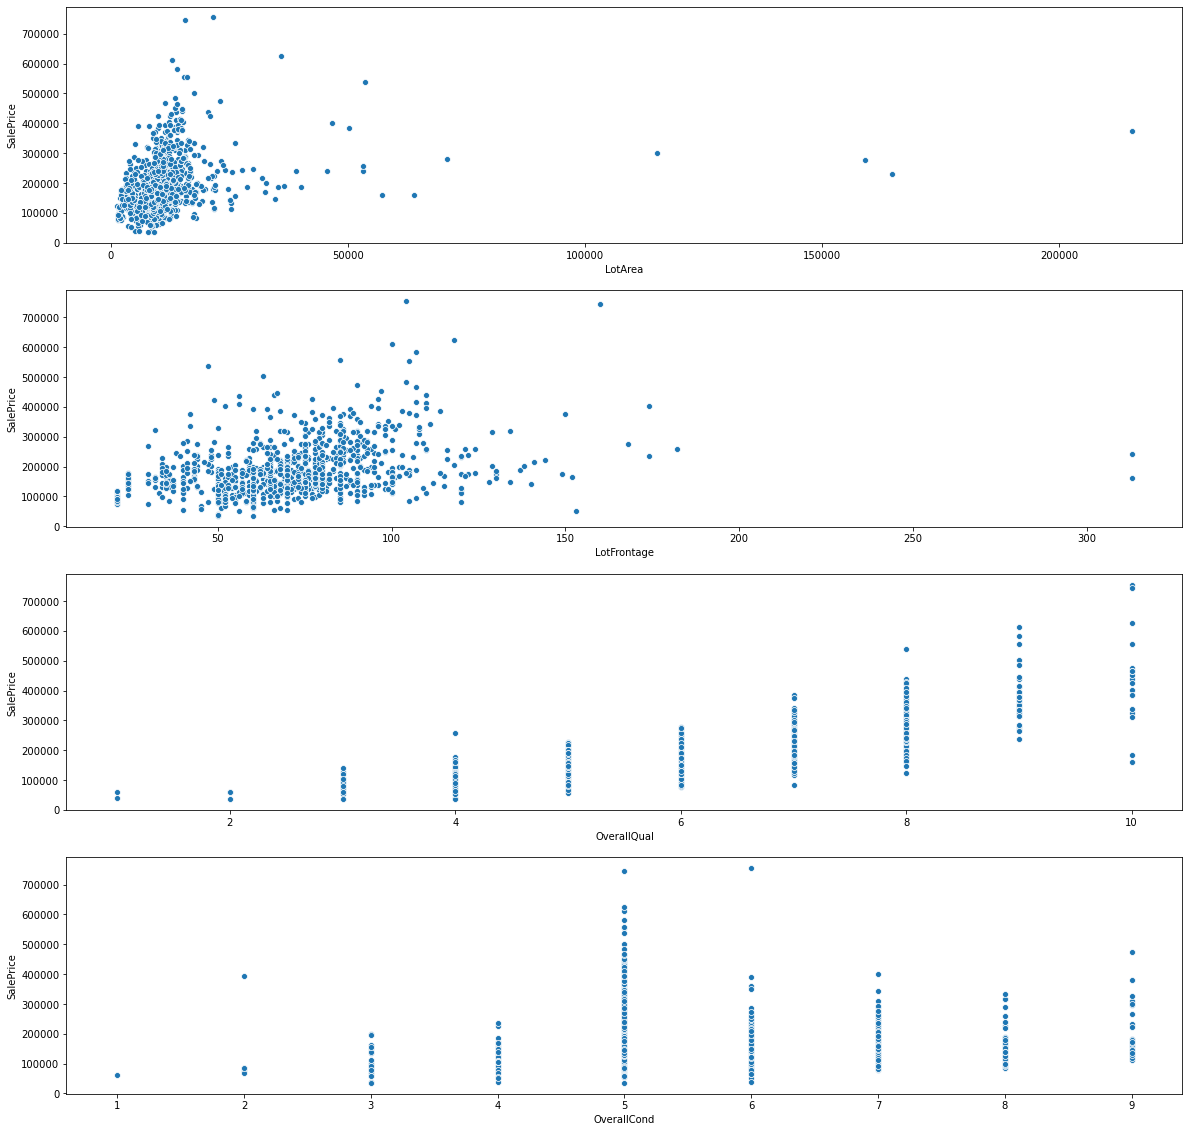

In [12]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = train)
plt.subplot(412)
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = train)
plt.subplot(413)
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = train)
plt.subplot(414)
sns.scatterplot(x = 'OverallCond', y = 'SalePrice', data = train)

In [13]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

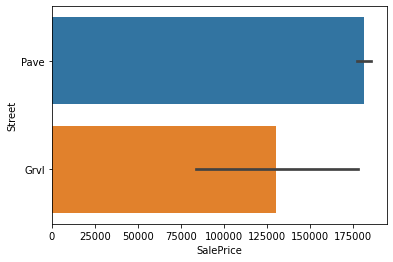

In [14]:
sns.barplot(x = 'SalePrice', y = 'Street', data = train)

In [15]:
train['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

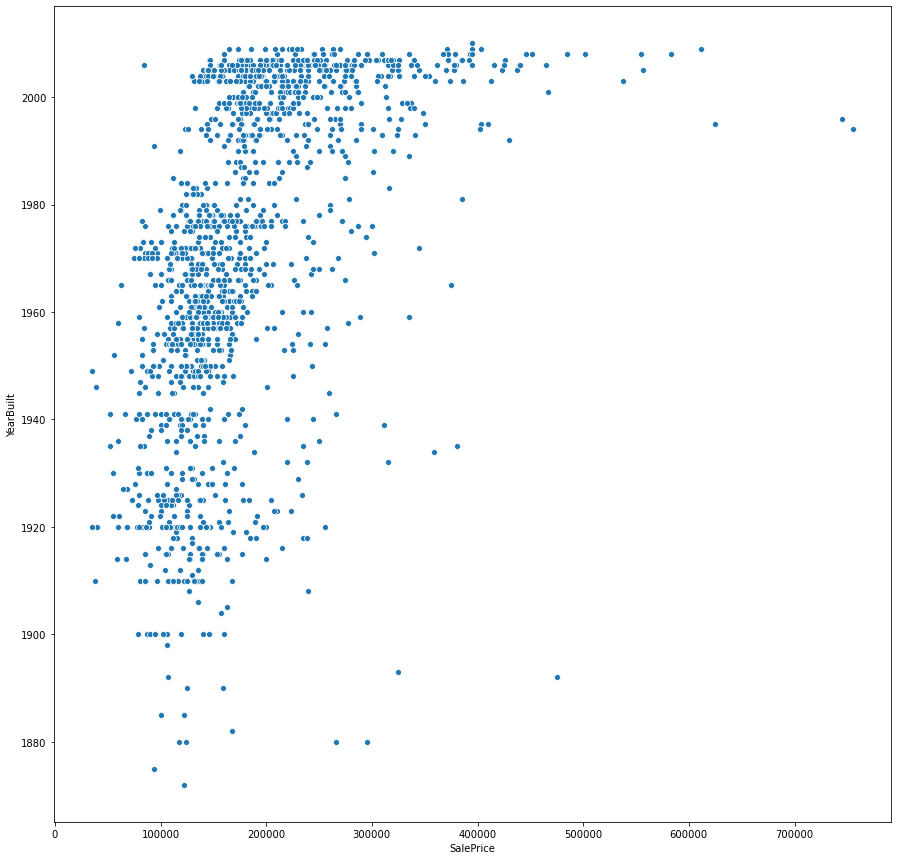

In [16]:
plt.figure(figsize=[15,15])
sns.scatterplot(x = 'SalePrice', y = 'YearBuilt', data = train)

In [17]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

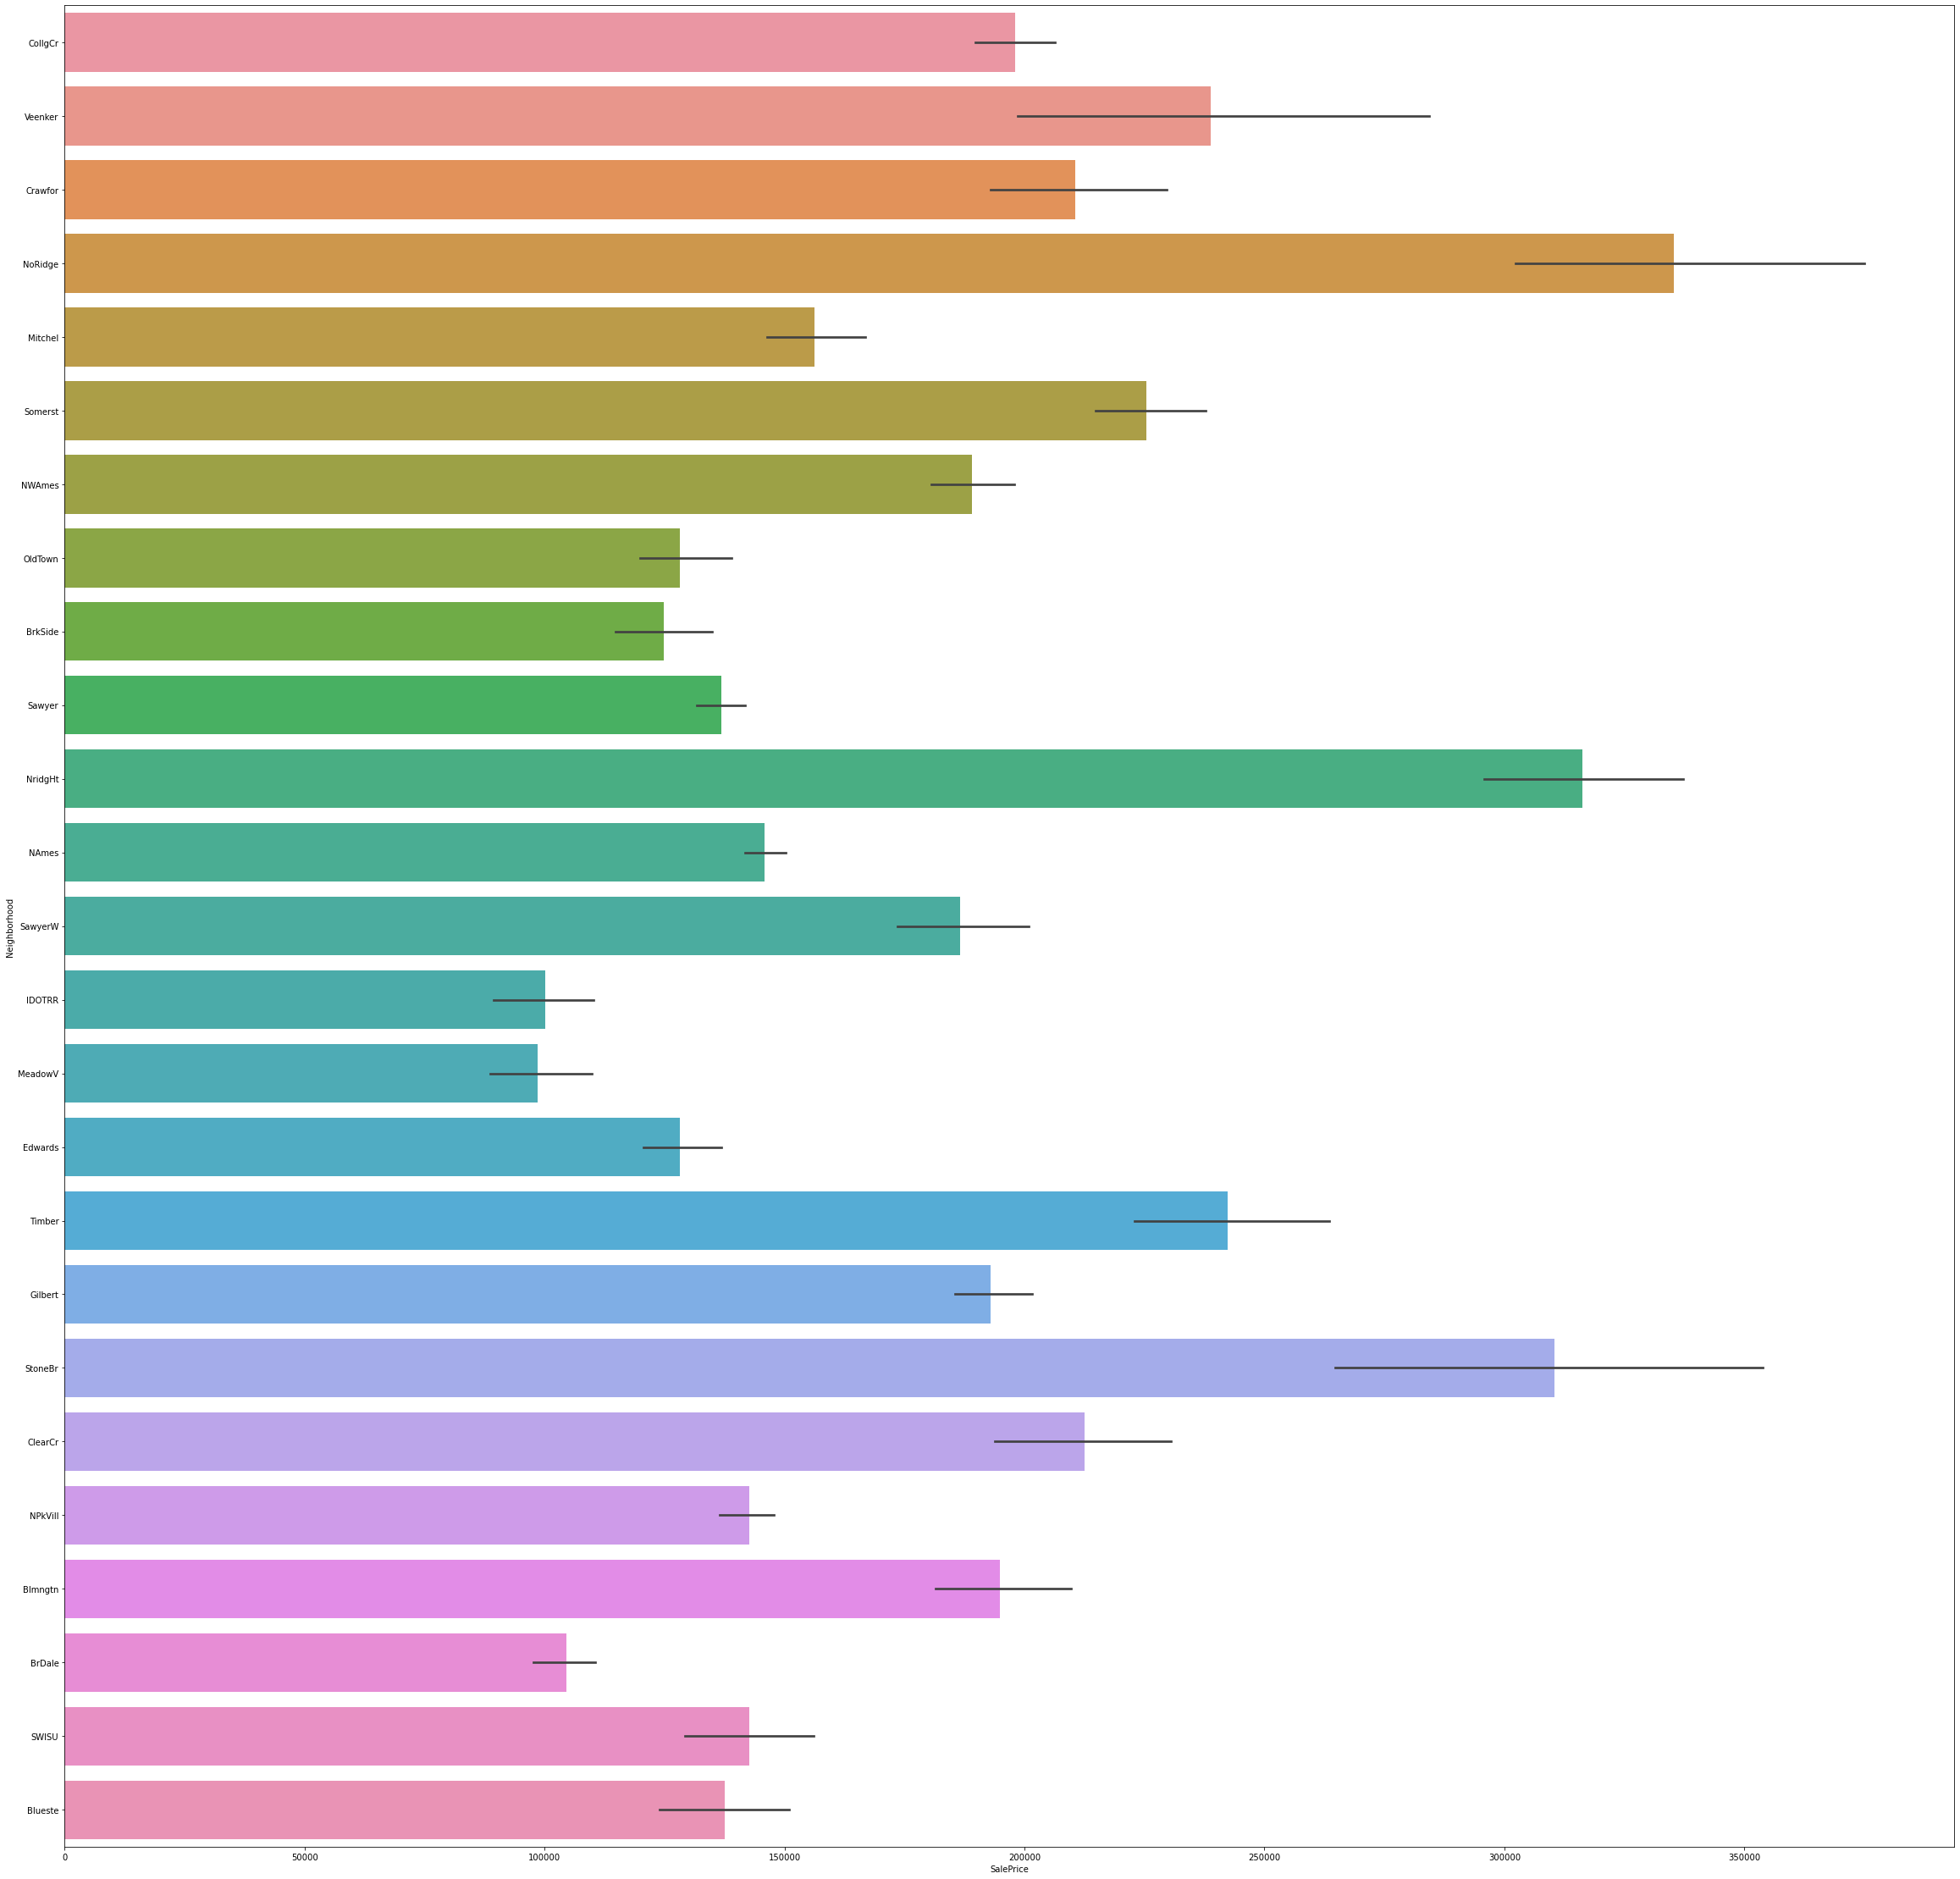

In [18]:
plt.figure(figsize=[40,40])
sns.barplot(x = 'SalePrice', y = 'Neighborhood', data = train)

In [19]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [20]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4])

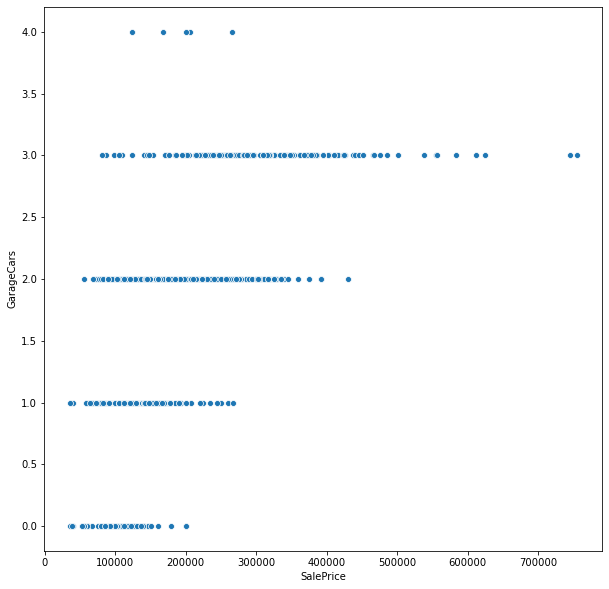

In [21]:
plt.figure(figsize=[10,10])
sns.scatterplot(x = 'SalePrice', y = 'GarageCars', data = train)

In [22]:
train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

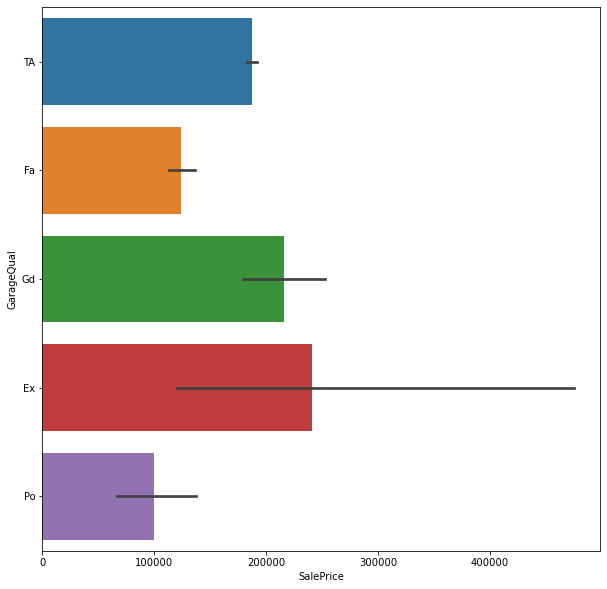

In [23]:
plt.figure(figsize=[10,10])
sns.barplot(x = 'SalePrice', y = 'GarageQual', data = train)

In [24]:
train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

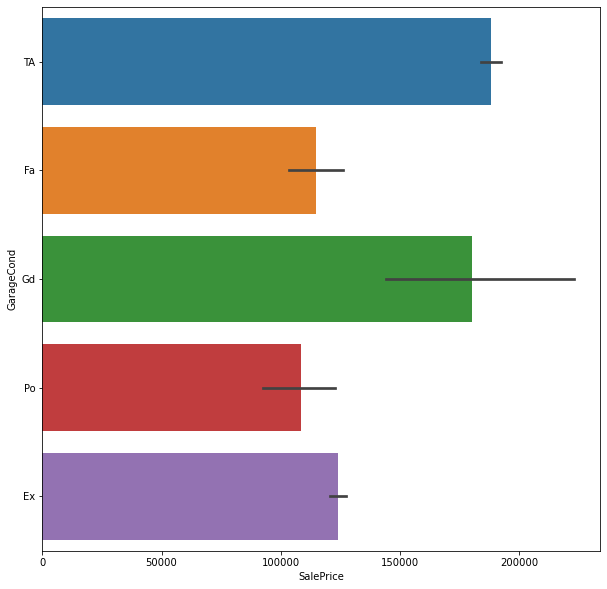

In [25]:
plt.figure(figsize=[10,10])
sns.barplot(x = 'SalePrice', y = 'GarageCond', data = train)

In [26]:
train['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

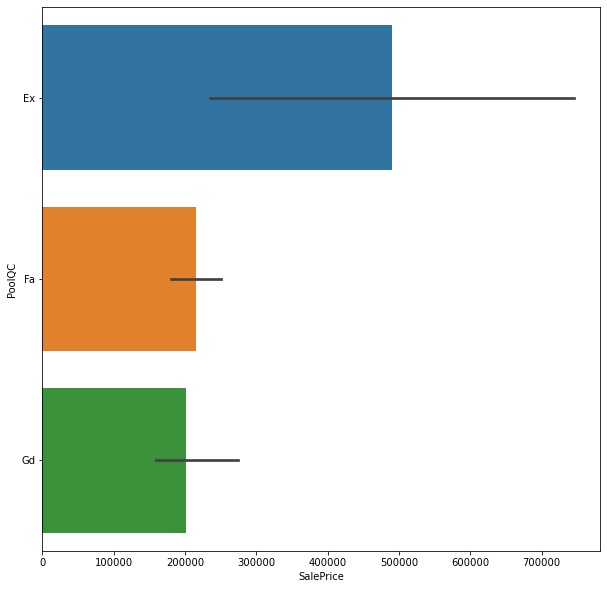

In [27]:
plt.figure(figsize=[10,10])
sns.barplot(x = 'SalePrice', y = 'PoolQC', data = train)

In [28]:
train['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

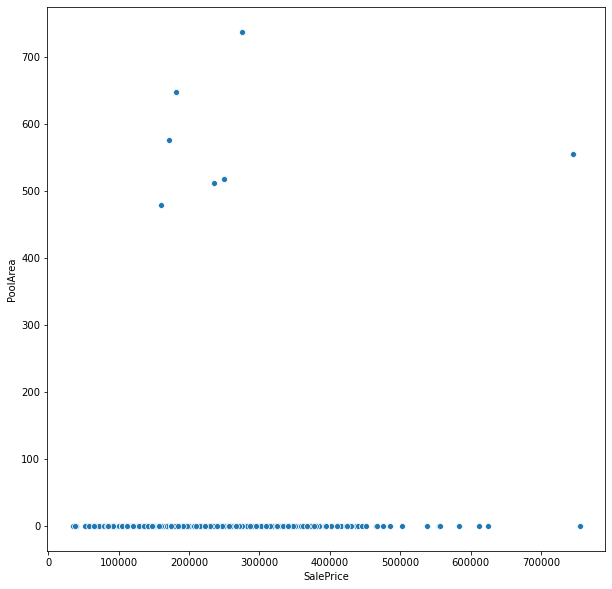

In [29]:
plt.figure(figsize=[10,10])
sns.scatterplot(x = 'SalePrice', y = 'PoolArea', data = train)

In [30]:
train['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

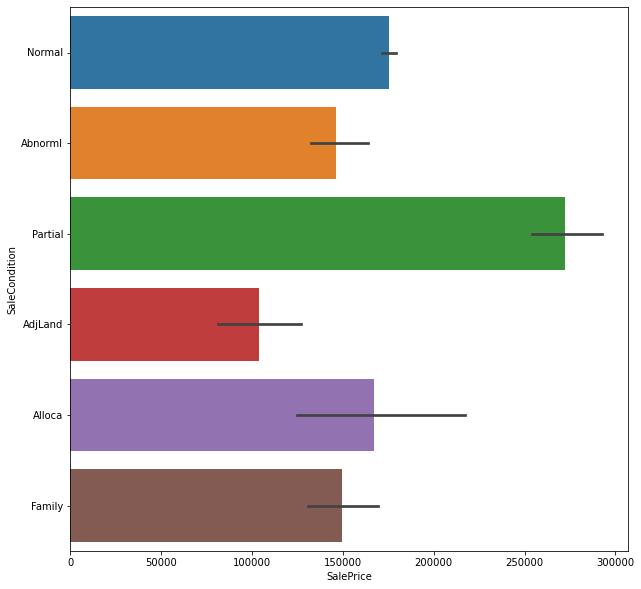

In [31]:
plt.figure(figsize=[10,10])
sns.barplot(x = 'SalePrice', y = 'SaleCondition', data = train)

In [32]:
numerical = train[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

In [33]:
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [34]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

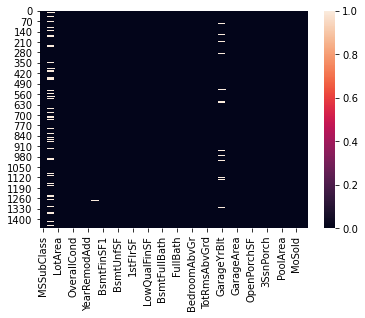

In [35]:
sns.heatmap(numerical.isnull())

In [36]:
numerical.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [37]:
numerical['LotFrontage'] = numerical['LotFrontage'].fillna(numerical['LotFrontage'].mean())
numerical['GarageYrBlt'] = numerical['GarageYrBlt'].fillna(numerical['GarageYrBlt'].mean())
numerical['MasVnrArea'] = numerical['MasVnrArea'].fillna(numerical['MasVnrArea'].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [38]:
numerical_test = test[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

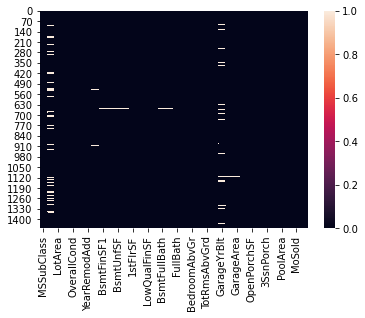

In [39]:
sns.heatmap(numerical_test.isnull())

In [40]:
numerical_test.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [41]:
numerical_test['LotFrontage'] = numerical_test['LotFrontage'].fillna(numerical['LotFrontage'].mean())
numerical_test['GarageYrBlt'] = numerical_test['GarageYrBlt'].fillna(numerical['GarageYrBlt'].mean())
numerical_test['MasVnrArea'] = numerical_test['MasVnrArea'].fillna(numerical['MasVnrArea'].mean())
numerical_test['BsmtFullBath'] = numerical_test['BsmtFullBath'].fillna(numerical['BsmtFullBath'].mean())
numerical_test['BsmtHalfBath'] = numerical_test['BsmtHalfBath'].fillna(numerical['BsmtHalfBath'].mean())
numerical_test['GarageCars'] = numerical_test['GarageCars'].fillna(numerical['GarageCars'].mean())
numerical_test['GarageYrBlt'] = numerical_test['GarageYrBlt'].fillna(numerical['GarageYrBlt'].mean())
numerical_test['GarageArea'] = numerical_test['GarageArea'].fillna(numerical['GarageArea'].mean())
numerical_test['BsmtFinSF1'] = numerical_test['BsmtFinSF1'].fillna(numerical['BsmtFinSF1'].mean())
numerical_test['BsmtFinSF2'] = numerical_test['BsmtFinSF2'].fillna(numerical['BsmtFinSF2'].mean())
numerical_test['BsmtUnfSF'] = numerical_test['BsmtUnfSF'].fillna(numerical['BsmtUnfSF'].mean())
numerical_test['TotalBsmtSF'] = numerical_test['TotalBsmtSF'].fillna(numerical['TotalBsmtSF'].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [42]:
categorical = train[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                    'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                    'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType']]

In [43]:
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD


In [44]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Street        1460 non-null   object
 2   Alley         91 non-null     object
 3   LotShape      1460 non-null   object
 4   LandContour   1460 non-null   object
 5   Utilities     1460 non-null   object
 6   LotConfig     1460 non-null   object
 7   LandSlope     1460 non-null   object
 8   Neighborhood  1460 non-null   object
 9   Condition1    1460 non-null   object
 10  Condition2    1460 non-null   object
 11  BldgType      1460 non-null   object
 12  HouseStyle    1460 non-null   object
 13  RoofStyle     1460 non-null   object
 14  RoofMatl      1460 non-null   object
 15  Exterior1st   1460 non-null   object
 16  Exterior2nd   1460 non-null   object
 17  MasVnrType    1452 non-null   object
 18  ExterQual     1460 non-null   object
 19  ExterC

**Handling null values**

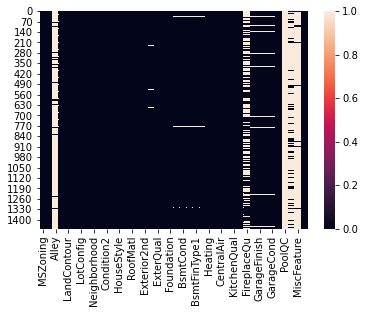

In [45]:
sns.heatmap(categorical.isnull())

In [46]:
categorical.isnull().sum()

MSZoning           0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
PoolQC          1453
Fence           1179
MiscFeature     1406
SaleType           0
dtype: int64

In [47]:
categorical = categorical.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [48]:
categorical['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [49]:
categorical['BsmtQual'] = categorical['BsmtQual'].fillna('TA')

In [50]:
categorical['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [51]:
categorical['BsmtCond'] = categorical['BsmtCond'].fillna('TA')

In [52]:
categorical['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [53]:
categorical['BsmtExposure'] = categorical['BsmtExposure'].fillna('No')

In [54]:
categorical['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [55]:
categorical['BsmtFinType1'] = categorical['BsmtFinType1'].fillna('Unf')

In [56]:
categorical['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [57]:
categorical['BsmtFinType2'] = categorical['BsmtFinType2'].fillna('Unf')

In [58]:
categorical['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [59]:
categorical['MasVnrType'] = categorical['MasVnrType'].fillna('None')

In [60]:
categorical['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [61]:
categorical['Electrical'] = categorical['Electrical'].fillna('SBrkr')

In [62]:
categorical['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [63]:
categorical['GarageFinish'] = categorical['GarageFinish'].fillna('Unf')

In [64]:
categorical['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [65]:
categorical['GarageType'] = categorical['GarageType'].fillna('Attchd')

In [66]:
categorical['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [67]:
categorical['GarageCond'] = categorical['GarageCond'].fillna('TA')

In [68]:
categorical['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [69]:
categorical['GarageQual'] = categorical['GarageQual'].fillna('TA')

In [70]:
categorical_test = test[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                    'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                    'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType']]

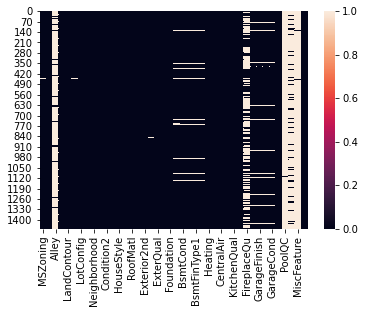

In [71]:
sns.heatmap(categorical_test.isnull())

In [72]:
categorical_test.isnull().sum()

MSZoning           4
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PavedDrive         0
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [73]:
categorical_test = categorical_test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [74]:
categorical_test['BsmtQual'] = categorical_test['BsmtQual'].fillna('TA')

In [75]:
categorical_test['BsmtCond'] = categorical_test['BsmtCond'].fillna('TA')

In [76]:
categorical_test['BsmtExposure'] = categorical_test['BsmtExposure'].fillna('No')

In [77]:
categorical_test['BsmtFinType1'] = categorical_test['BsmtFinType1'].fillna('Unf')

In [78]:
categorical_test['BsmtFinType2'] = categorical_test['BsmtFinType2'].fillna('Unf')

In [79]:
categorical_test['MasVnrType'] = categorical_test['MasVnrType'].fillna('None')

In [80]:
categorical_test['Electrical'] = categorical_test['Electrical'].fillna('SBrkr')

In [81]:
categorical_test['GarageFinish'] = categorical_test['GarageFinish'].fillna('Unf')

In [82]:
categorical_test['GarageType'] = categorical_test['GarageType'].fillna('Attchd')

In [83]:
categorical_test['GarageCond'] = categorical_test['GarageCond'].fillna('TA')

In [84]:
categorical_test['GarageQual'] = categorical_test['GarageQual'].fillna('TA')

In [85]:
categorical['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [86]:
categorical_test['MSZoning'] = categorical_test['MSZoning'].fillna('RL')

In [87]:
categorical['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [88]:
categorical_test['Utilities'] = categorical_test['Utilities'].fillna('AllPub')

In [89]:
categorical['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [90]:
categorical_test['Exterior1st'] = categorical_test['Exterior1st'].fillna('VinylSd')

In [91]:
categorical['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [92]:
categorical_test['Exterior2nd'] = categorical_test['Exterior2nd'].fillna('VinylSd')

In [93]:
categorical['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [94]:
categorical_test['KitchenQual'] = categorical_test['KitchenQual'].fillna('TA')

In [95]:
categorical['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [96]:
categorical_test['Functional'] = categorical_test['Functional'].fillna('Typ')

In [97]:
categorical['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [98]:
categorical_test['SaleType'] = categorical_test['SaleType'].fillna('WD')

In [99]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
categorical_one_hot = onehotencoder.fit_transform(categorical).toarray()

In [100]:
categorical_test_one_hot = onehotencoder.transform(categorical_test).toarray()

In [101]:
categorical_one_hot.shape

(1460, 228)

In [102]:
categorical_test_one_hot.shape

(1459, 228)

In [103]:
categorical_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [104]:
categorical_one_hot = pd.DataFrame(categorical_one_hot)

In [105]:
categorical_test_one_hot = pd.DataFrame(categorical_test_one_hot)

In [106]:
train_data = pd.concat([categorical_one_hot, numerical], axis=1)

In [107]:
test_data = pd.concat([categorical_test_one_hot, numerical_test], axis=1)

In [108]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,548,0,61,0,0,0,0,0,2,2008
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,460,298,0,0,0,0,0,0,5,2007
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,608,0,42,0,0,0,0,0,9,2008
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,642,0,35,272,0,0,0,0,2,2006
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,460,0,40,0,0,0,0,0,8,2007
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,500,349,0,0,0,0,0,0,2,2010
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,240,366,0,112,0,0,0,0,4,2010


In [109]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(train_data)

In [111]:
X_pred = scaler.transform(test_data)

In [112]:
y = train['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [114]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.36363636,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27272727,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45454545,
        0.25      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.54545455,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45454545,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27272727,
        0.5       ]])

In [115]:
y_train

680    143000
796    143500
67     226000
98      83000
369    162000
        ...  
873    133000
598    217500
444    210000
298    175000
155     79000
Name: SalePrice, Length: 1095, dtype: int64

**GradientBoostingRegressor and train model**

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters = {'learning_rate':(0.1, 0.01), 'n_estimators':range(30, 250, 10)}
grad = GradientBoostingRegressor()
reg = GridSearchCV(grad, parameters, cv=5)
reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': (0.1, 0.01),
                         'n_estimators': range(30, 250, 10)})

In [117]:
y_pred = reg.predict(X_test)
y_pred

array([101867.76350118, 276815.02328258, 150570.1991591 , 251527.16902047,
       141781.84606382, 157602.03708811, 117643.81522901, 170123.8956187 ,
       169732.41450375, 236694.31081091, 188861.92739133, 229083.26588787,
       131304.11053131, 256079.69483665, 127402.97551195,  68978.47551476,
       113258.05889151, 169057.63078435, 173608.62810819, 199587.51365723,
       190072.71865414, 176046.06236809, 176253.83849686, 149663.59517616,
       169125.44972158, 216232.53571473, 146472.7986956 , 143792.76036838,
       197658.94589327, 254570.54116944, 135782.46756178, 152956.7584904 ,
       159662.09621897, 141645.54848735, 112947.71546001, 178786.37902677,
       207115.3415653 , 151615.41878637, 211814.2518932 , 121203.35628738,
       142621.64871071, 147680.61045232, 141076.40129779, 125014.95362848,
       132513.21699831, 142257.10053215, 119187.0315475 , 162874.49674641,
       137295.50258806, 115980.11844159, 179112.94527293, 245002.16791892,
       135285.09489348, 1

In [118]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)

0.018473928230640316

In [119]:
prediction = reg.predict(X_pred)

In [120]:
prediction[0]

120428.81997829856

In [121]:
submission = pd.DataFrame()
submission['Id'] = sample_sub['Id']
submission['SalePrice'] = prediction.astype('int64')

In [122]:
submission.to_csv('submission.csv', index=False)